In [1]:
from scipy.io import wavfile 
import numpy as np 
from skimage.restoration import denoise_wavelet
import matplotlib.pyplot as plt
import soundfile as sf 
import os 
import scipy.io.wavfile as wavfile

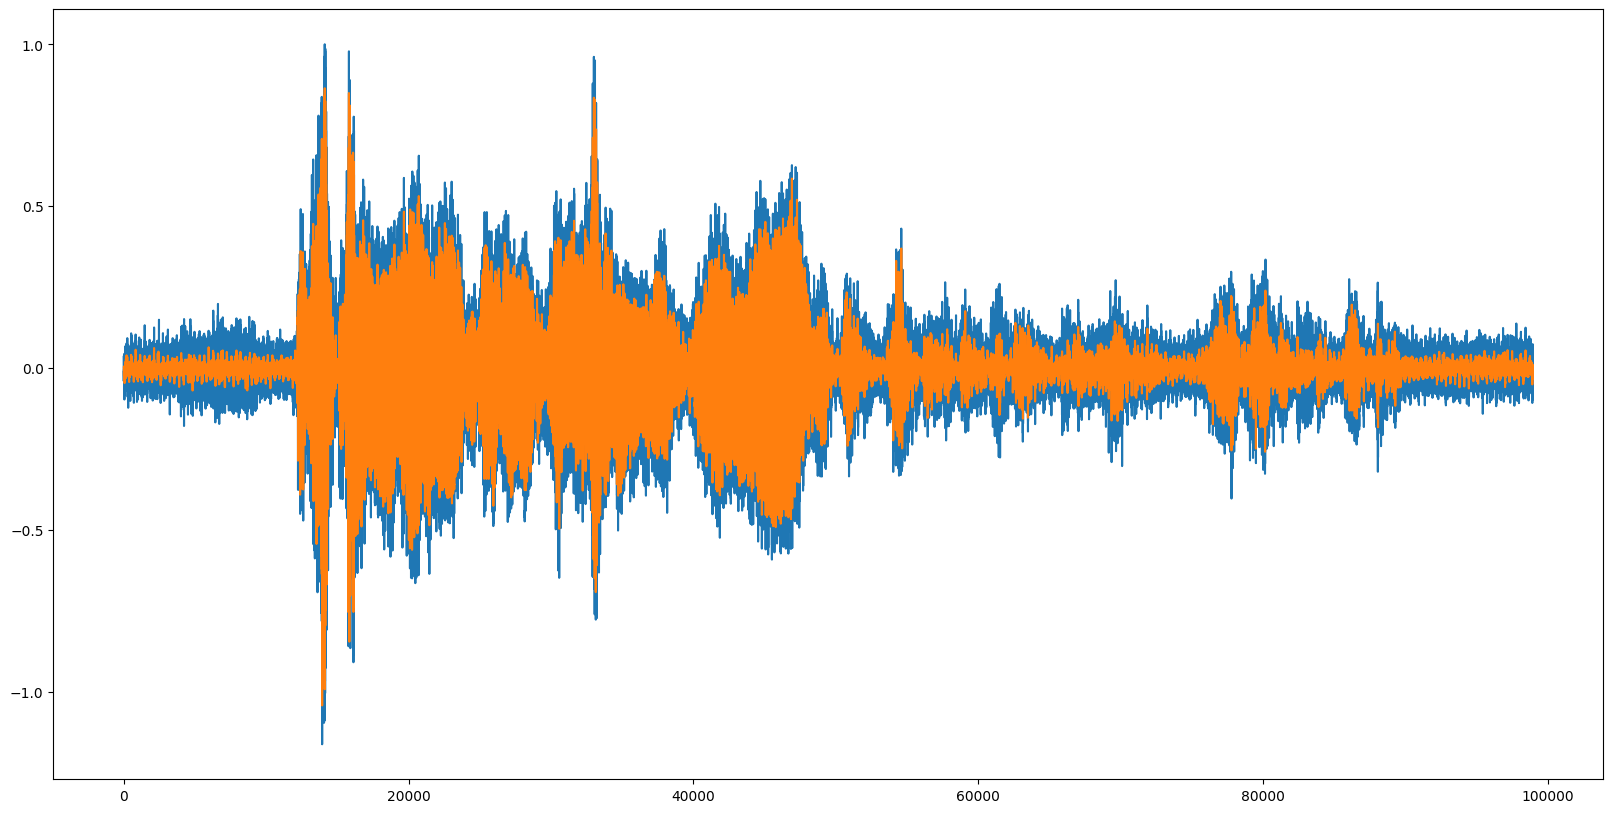

In [3]:
#Appplying Wavelet transform to remove noise of 1 .wav file as an example 
#The example file = 00a49d6b07.wav
Fs ,x = wavfile.read("single-channel/test/00a49d6b07.wav")
x=x/max(x) #Normalizing

x_denoise = denoise_wavelet(x, method='VisuShrink', mode='soft', wavelet_levels=3, wavelet='sym8', rescale_sigma='True')

plt.figure(figsize=(20, 10), dpi=100)
plt.plot(x)
plt.plot(x_denoise)

In [8]:
#See the sizes of .wav files with noises and after removing noises
print(len(x_denoise))
print(len(x))
print("Sample rate = ", Fs)   #Sample rate

98970
98970
Sample rate =  16000


In [9]:
sf.write('single-channel/denoised/00a49d6b07.wav', x_denoise, 16000)  #Writing denoise file into .wav form

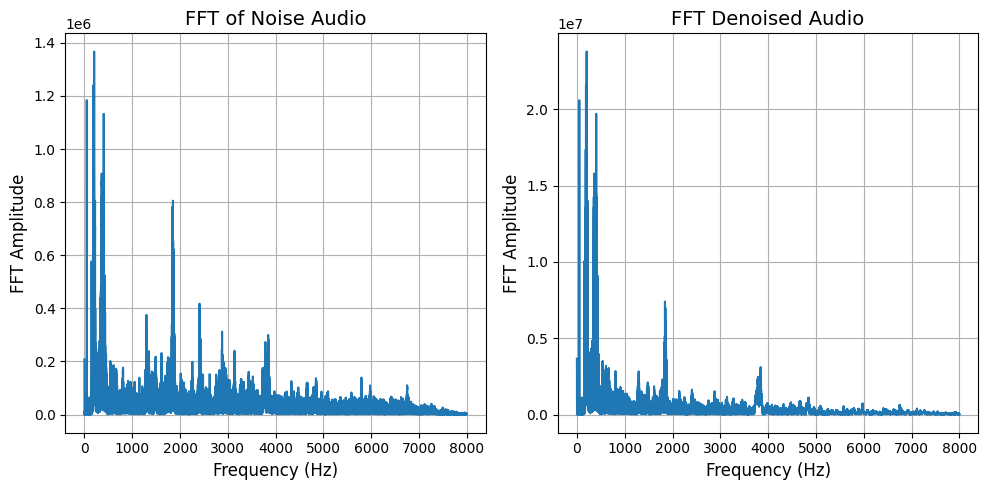

In [10]:
#Let's plot fft of noise and denoise signals to compare
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt

wav_file_1_path = "single-channel/test/00a49d6b07.wav"
wav_file_2_path = "single-channel/denoised/00a49d6b07.wav"

sample_rate_1, audio_data_1 = wavfile.read(wav_file_1_path)
sample_rate_2, audio_data_2 = wavfile.read(wav_file_2_path)

if sample_rate_1 != sample_rate_2:
    raise ValueError("Sample rates of both files should be equal!")

num_samples_1 = len(audio_data_1)
num_samples_2 = len(audio_data_2)

fft_data_1 = np.fft.fft(audio_data_1)
fft_data_2 = np.fft.fft(audio_data_2)

fft_frequencies = np.fft.fftfreq(num_samples_1, 1/sample_rate_1)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(fft_frequencies[:num_samples_1//2], np.abs(fft_data_1[:num_samples_1//2]))
plt.xlabel("Frequency (Hz)", fontsize=12)
plt.ylabel("FFT Amplitude", fontsize=12)
plt.title(f"FFT of Noise Audio", fontsize=14)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(fft_frequencies[:num_samples_1//2], np.abs(fft_data_2[:num_samples_1//2]))
plt.xlabel("Frequency (Hz)", fontsize=12)
plt.ylabel("FFT Amplitude", fontsize=12)
plt.title(f"FFT Denoised Audio", fontsize=14)
plt.grid(True)

plt.tight_layout()
plt.show()


In [12]:
#We tried the code for a single .wav file 
#Now let's try it for a whole folder that includes many .wav files
folder_path = "C:/Users/nidul/Desktop/ACCA Folder My/Signal processing cup/ROBOVOX_SP_CUP_2024/single-channel/test"  # Replace with the actual path to your folder

wav_file_paths = []

for root, directories, files in os.walk(folder_path):
    for file in files:
        if file.endswith(".wav"):
            file_path = os.path.join(root, file)
            wav_file_paths.append(file_path)

print(wav_file_paths)


['C:/Users/nidul/Desktop/ACCA Folder My/Signal processing cup/ROBOVOX_SP_CUP_2024/single-channel/test\\0000f88619.wav', 'C:/Users/nidul/Desktop/ACCA Folder My/Signal processing cup/ROBOVOX_SP_CUP_2024/single-channel/test\\000f6d0072.wav', 'C:/Users/nidul/Desktop/ACCA Folder My/Signal processing cup/ROBOVOX_SP_CUP_2024/single-channel/test\\001dd0cb47.wav', 'C:/Users/nidul/Desktop/ACCA Folder My/Signal processing cup/ROBOVOX_SP_CUP_2024/single-channel/test\\001f7db31a.wav', 'C:/Users/nidul/Desktop/ACCA Folder My/Signal processing cup/ROBOVOX_SP_CUP_2024/single-channel/test\\001f86a5bf.wav', 'C:/Users/nidul/Desktop/ACCA Folder My/Signal processing cup/ROBOVOX_SP_CUP_2024/single-channel/test\\002724b7ea.wav', 'C:/Users/nidul/Desktop/ACCA Folder My/Signal processing cup/ROBOVOX_SP_CUP_2024/single-channel/test\\0042734703.wav', 'C:/Users/nidul/Desktop/ACCA Folder My/Signal processing cup/ROBOVOX_SP_CUP_2024/single-channel/test\\00465a38b0.wav', 'C:/Users/nidul/Desktop/ACCA Folder My/Signal p

In [13]:
print(len(wav_file_paths))  #Just to know the length of list

10332


In [14]:
#Now let's wirte denoised .wav files in a new folder (New folder I named as denoise audio)
output_folder = "C:/Users/nidul/Desktop/ACCA Folder My/Signal processing cup/ROBOVOX_SP_CUP_2024/single-channel/denoised"

os.makedirs(output_folder, exist_ok=True)

for file_path in wav_file_paths:
    Fs, x = wavfile.read(file_path)
    #x = x / max(x)  # Normalize
    #I commented the above line because I did the normalization after removing noises here

    x_denoise = denoise_wavelet(x, method='VisuShrink', mode='soft', wavelet_levels=3, wavelet='sym8', rescale_sigma='True')
    x_denoise = x_denoise / max(x_denoise)
    
    # Get the filename without the extension
    filename = os.path.splitext(os.path.basename(file_path))[0]

    # Construct the output file path
    output_file_path = os.path.join(output_folder, filename + ".wav")

    # Save the denoised file
    sf.write(output_file_path, x_denoise, 16000)  # Use soundfile for writing

c:\Users\nidul\.conda\envs\tf\lib\site-packages\skimage\restoration\_denoise.py:750: RuntimeWarning: overflow encountered in scalar subtract
  range_pre = image.max() - image.min()
